<a href="https://colab.research.google.com/github/Ishaan-Shende/NewRepo/blob/master/Bankruptcy%20Prediction%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('once')
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
print(data['Bankrupt?'].value_counts())
Y = data['Bankrupt?']
data = data.drop(['Bankrupt?'], axis=1)

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [ ]:
X_cols = ['Bankrupt?',
'ROA(C) before interest and depreciation before interest: Return On Total Assets(C)',
'ROA(A) before interest and % after tax: Return On Total Assets(A)',
'ROA(B) before interest and depreciation after tax: Return On Total Assets(B)',
'Operating Gross Margin: Gross Profit/Net Sales',
'Realized Sales Gross Margin: Realized Gross Profit/Net Sales',
'Operating Profit Rate: Operating Income/Net Sales',
'Pre-tax net Interest Rate: Pre-Tax Income/Net Sales',
'After-tax net Interest Rate: Net Income/Net Sales',
'Non-industry income and expenditure/revenue: Net Non-operating Income Ratio',
'Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales',
'Operating Expense Rate: Operating Expenses/Net Sales',
'Research and development expense rate: (Research and Development Expenses)/Net Sales',
'Cash flow rate: Cash Flow from Operating/Current Liabilities',
'Interest-bearing debt interest rate: Interest-bearing Debt/Equity',
'Tax rate (A): Effective Tax Rate',
'Net Value Per Share (B): Book Value Per Share(B)',
'Net Value Per Share (A): Book Value Per Share(A)',
'Net Value Per Share (C): Book Value Per Share(C)',
'Persistent EPS in the Last Four Seasons: EPS-Net Income',
'Cash Flow Per Share',
'Revenue Per Share (Yuan ¥): Sales Per Share',
'Operating Profit Per Share (Yuan ¥): Operating Income Per Share',
'Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share',
'Realized Sales Gross Profit Growth Rate',
'Operating Profit Growth Rate: Operating Income Growth',
'After-tax Net Profit Growth Rate: Net Income Growth',
'Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth',
'Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth',
'Total Asset Growth Rate: Total Asset Growth',
'Net Value Growth Rate: Total Equity Growth',
'Total Asset Return Growth Rate Ratio: Return on Total Asset Growth',
'Cash Reinvestment %: Cash Reinvestment Ratio',
'Current Ratio',
'Quick Ratio: Acid Test',
'Interest Expense Ratio: Interest Expenses/Total Revenue',
'Total debt/Total net worth: Total Liability/Equity Ratio',
'Debt ratio %: Liability/Total Assets',
'Net worth/Assets: Equity/Total Assets',
'Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets',
'Borrowing dependency: Cost of Interest-bearing Debt',
'Contingent liabilities/Net worth: Contingent Liability/Equity',
'Operating profit/Paid-in capital: Operating Income/Capital',
'Net profit before tax/Paid-in capital: Pretax Income/Capital',
'Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity',
'Total Asset Turnover',
'Accounts Receivable Turnover',
'Average Collection Days: Days Receivable Outstanding',
'Inventory Turnover Rate (times)',
'Fixed Assets Turnover Frequency',
'Net Worth Turnover Rate (times): Equity Turnover',
'Revenue per person: Sales Per Employee',
'Operating profit per person: Operation Income Per Employee',
'Allocation rate per person: Fixed Assets Per Employee',
'Working Capital to Total Assets',
'Quick Assets/Total Assets',
'Current Assets/Total Assets',
'Cash/Total Assets',
'Quick Assets/Current Liability',
'Cash/Current Liability',
'Current Liability to Assets',
'Operating Funds to Liability',
'Inventory/Working Capital',
'Inventory/Current Liability',
'Current Liabilities/Liability',
'Working Capital/Equity',
'Current Liabilities/Equity',
'Long-term Liability to Current Assets',
'Retained Earnings to Total Assets',
'Total income/Total expense',
'Total expense/Assets',
'Current Asset Turnover Rate: Current Assets to Sales',
'Quick Asset Turnover Rate: Quick Assets to Sales',
'Working capitcal Turnover Rate: Working Capital to Sales',
'Cash Turnover Rate: Cash to Sales',
'Cash Flow to Sales',
'Fixed Assets to Assets',
'Current Liability to Liability',
'Current Liability to Equity',
'Equity to Long-term Liability',
'Cash Flow to Total Assets',
'Cash Flow to Liability',
'CFO to Assets',
'Cash Flow to Equity',
'Current Liability to Current Assets',
'Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise',
'Net Income to Total Assets',
'Total assets to GNP price',
'No-credit Interval',
'Gross Profit to Sales',
'Net Income to Stockholders Equity',
'Liability to Equity',
'Degree of Financial Leverage (DFL)',
'Interest Coverage Ratio (Interest expense to EBIT)',
'Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise',
'Equity to Liability']

In [ ]:
## removing too low variance

data_mean = np.mean(data, axis=0)

variance = np.var(data/data_mean, axis=0)
var_df = pd.DataFrame(variance,columns=['variance'])
var_df.sort_values(by='variance').style.background_gradient(sns.light_palette('BlueViolet', as_cmap=True))

,variance
Net Income Flag,0.000000
Operating Profit Growth Rate,0.000161
Operating Profit Rate,0.000170
Cash Flow to Sales,0.000193
Working capitcal Turnover Rate,0.000227
Working Capital/Equity,0.000252
Pre-tax net Interest Rate,0.000261
Continuous interest rate (after tax),0.000263
After-tax net Interest Rate,0.000283
Net Income to Stockholder's Equity,0.000299


In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(1.0).fit(data/data_mean)
vt_transform = vt.transform(data/data_mean)

high_var_cols = data.columns[vt.get_support()]
low_var_cols = data.columns[~vt.get_support()]

print("Removed cols :",len(low_var_cols))
print("Remaining cols :",len(high_var_cols))

Removed cols : 65
Remaining cols : 30


In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report,precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost  

X_train, X_test,y_train, y_test = train_test_split(data, Y.values, test_size=0.25, stratify=Y.values)
scaler = StandardScaler().fit(X_train)

models = dict()
models['Logreg'] = LogisticRegression(penalty='elasticnet',  class_weight={0:1,1:3}, solver='saga', l1_ratio=0.7)
models['GradientBoost'] = GradientBoostingClassifier(n_estimators=300)
models['XGBoost'] = xgboost.XGBClassifier(objective = 'binary:logistic')

for model in models:
    if model == 'Logreg':
        train = scaler.transform(X_train)
    else:
        train = X_train
    models[model].fit(train, y_train)
    print(model + ' : fit')


Logreg : fit
GradientBoost : fit
XGBoost : fit


Text(0.5, 0, 'Xgboost Feature Importance')

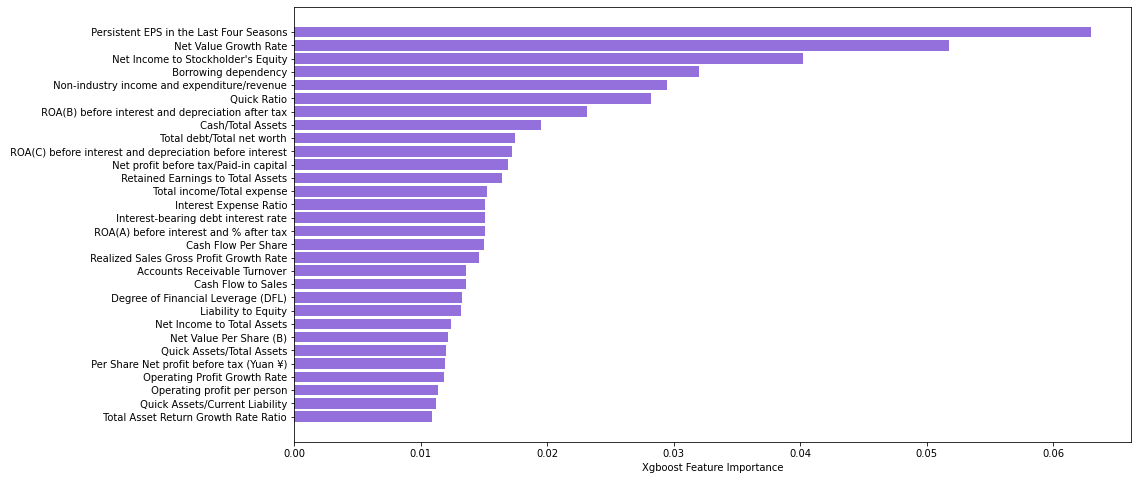

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train,eval_metric='auc',verbose=False)

fig, ax = plt.subplots(figsize=(15, 8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx[-30:]], xgb.feature_importances_[sorted_idx[-30:]], color = "MediumPurple")
plt.xlabel("Xgboost Feature Importance")

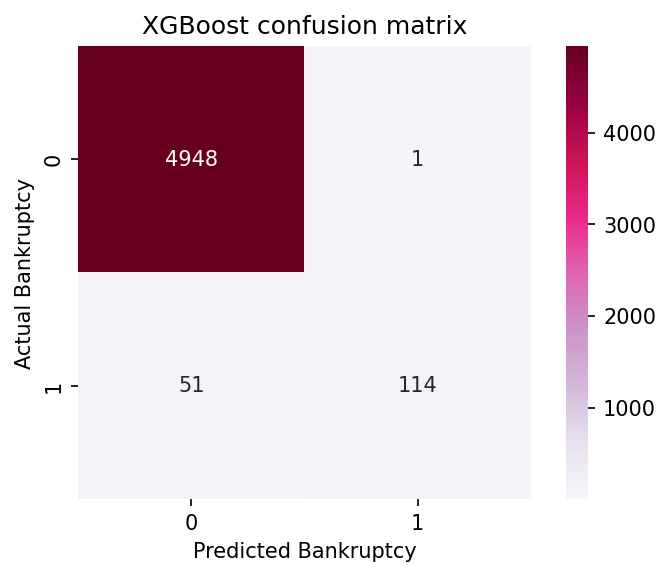

In [ ]:
baseline_confusion = confusion_matrix(y_train , xgb.predict(X_train))
plt.figure(dpi=150)
sns.heatmap(baseline_confusion, cmap=plt.cm.PuRd, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('XGBoost confusion matrix');

In [ ]:
import imblearn
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
# define dataset
# summarize class distribution
print(Counter(y_train))

# define oversampling strategy
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# fit and apply the transform
X_train_sm, y_train_sm = pipeline.fit_resample(X_train,y_train)
# summarize class distribution
print(Counter(y_train_sm))

Counter({0: 4949, 1: 165})
Counter({0: 3958, 1: 1979})


Text(0.5, 0, 'Xgboost Feature Importance')

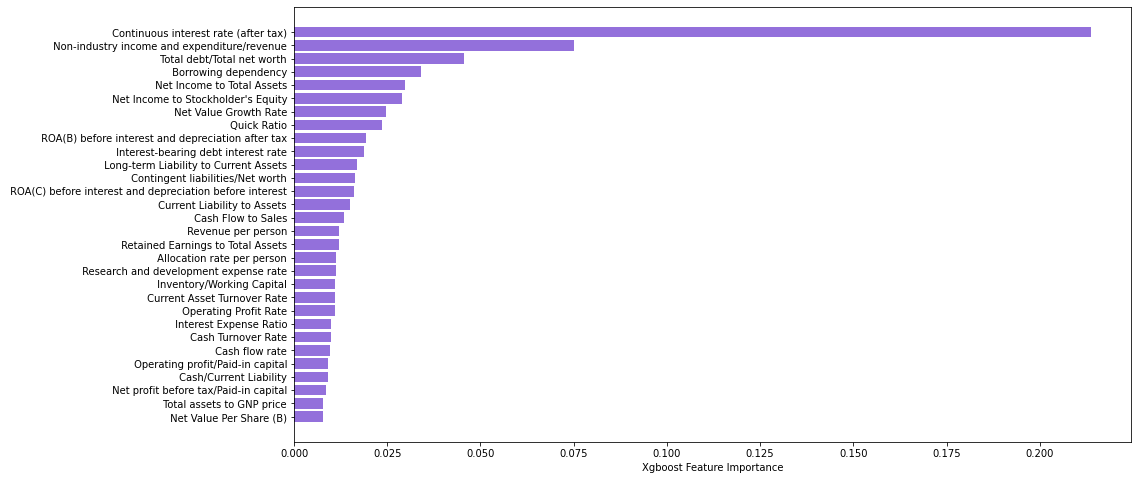

In [ ]:
xgb = xgboost.XGBClassifier()

xgb.fit(X_train_sm, y_train_sm, eval_metric='auc',verbose=False)

fig, ax = plt.subplots(figsize=(15, 8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx[-30:]], xgb.feature_importances_[sorted_idx[-30:]], color = "MediumPurple")
plt.xlabel("Xgboost Feature Importance")

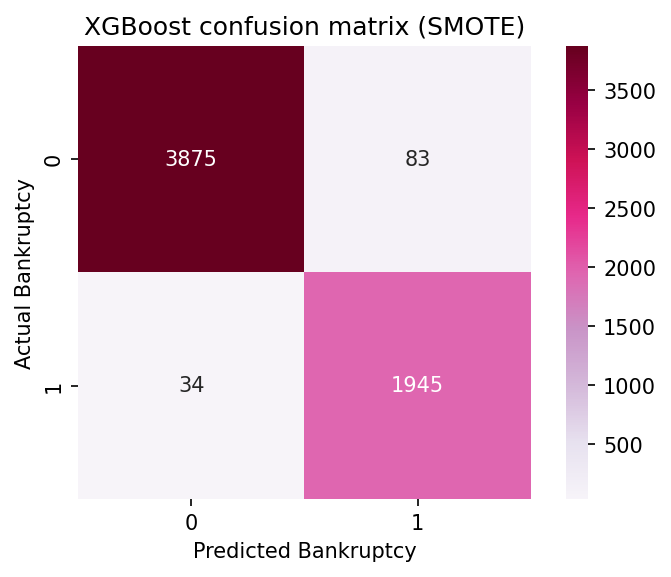

In [ ]:
baseline_confusion = confusion_matrix(y_train_sm , xgb.predict(X_train_sm))
plt.figure(dpi=150)
sns.heatmap(baseline_confusion, cmap=plt.cm.PuRd, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('XGBoost confusion matrix (SMOTE)');

In [ ]:
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score)
cv_score = cross_val_score(models['XGBoost'], X_train, y_train, cv=5, 
                           scoring=recall_scorer)

from sklearn.model_selection import RandomizedSearchCV

params = {'eta':[0.2,0.3,0.4],
         'max_depth':[5,6,7],
         'sampling_method':['uniform','gradient_based'],
         'lambda':[1,1.5],
         'alpha':[0,0.5],
         }

search = RandomizedSearchCV(estimator = models['XGBoost'], n_iter=50, 
                            scoring = recall_scorer, cv=5, verbose=1, 
                            param_distributions=params)
search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=50,
                   param_distributions={'alpha': [0, 0.5],
                                        'eta': [0.2, 0.3, 0.4],
                                        'lambda': [1, 1.5],
                                        'max_depth': [5, 6, 7],
                                        'sampling_method': ['uniform',
                                                            'gradient_based']},
                   scoring=make_scorer(recall_score), verbose=1)

In [ ]:
print("Best cv score :",search.best_score_)
print("Best params :",search.best_params_)

Best cv score : 0.2606060606060606
Best params : {'sampling_method': 'uniform', 'max_depth': 5, 'lambda': 1, 'eta': 0.3, 'alpha': 0.5}


Text(0.5, 0, 'Xgboost Feature Importance')

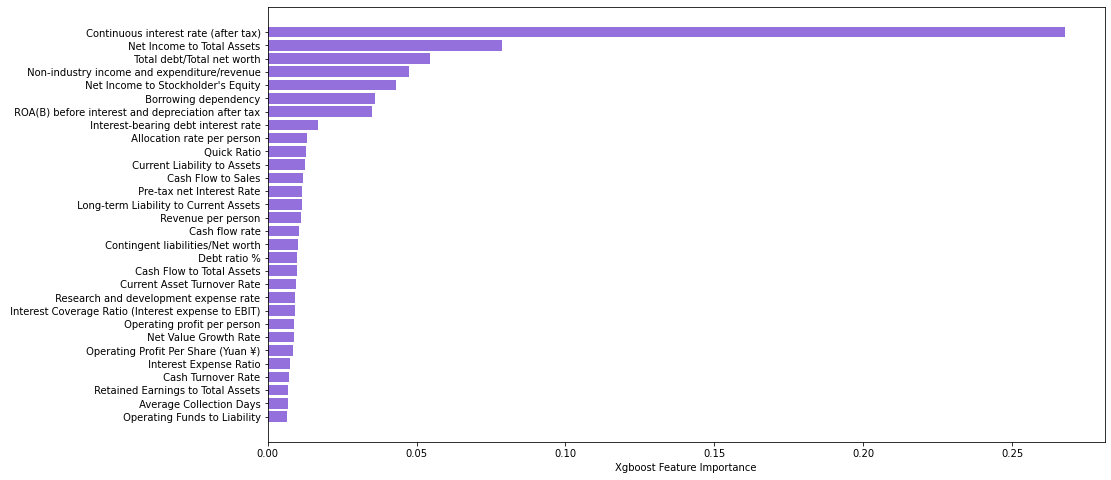

In [67]:
xgb = xgboost.XGBClassifier(
    sampling_method = 'gradient_based',
    max_depth = 5,
    reg_lambda = 1,
    learning_rate = 0.3,
    reg_alpha = 0.5,
    seed = 27 
)

xgb.fit(X_train_sm, y_train_sm)

fig, ax = plt.subplots(figsize=(15, 8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx[-30:]], xgb.feature_importances_[sorted_idx[-30:]], color = "MediumPurple")
plt.xlabel("Xgboost Feature Importance")

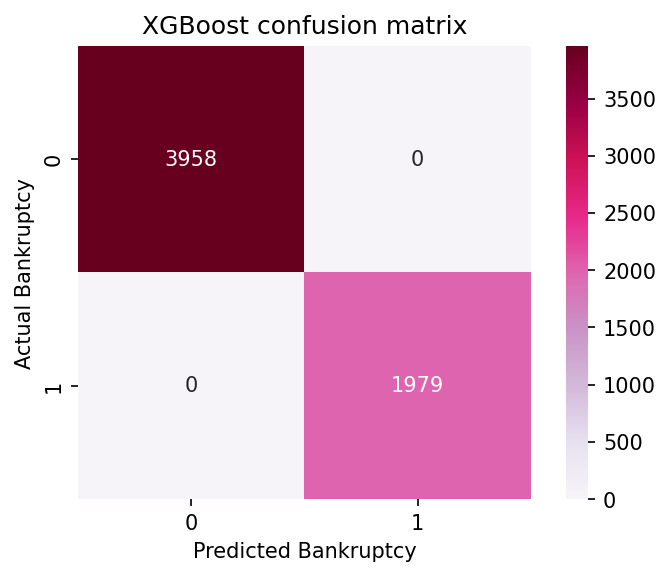

In [ ]:
baseline_confusion = confusion_matrix(y_train_sm , xgb.predict(X_train_sm))
plt.figure(dpi=150)
sns.heatmap(baseline_confusion, cmap=plt.cm.PuRd, annot=True, square=True, fmt='g')

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy') 
plt.title('XGBoost confusion matrix');

In [ ]:
# Test set
y_test_pred_prob = xgb.predict_proba(X_test)
y_test_pred_prob_lowerThres = y_test_pred_prob[:,1] > 0.1
arg_test = {'y_true':y_test, 'y_pred':y_test_pred_prob_lowerThres}
print("TEST\n")
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

# Train set
y_train_pred_prob = xgb.predict_proba(X_train)
y_train_pred_prob_lowerThres = y_train_pred_prob[:,1] > 0.1
arg_train = {'y_true':y_train, 'y_pred':y_train_pred_prob_lowerThres}
print("TRAIN\n")
print(confusion_matrix(**arg_train))
print(classification_report(**arg_train))

TEST

[[1576   74]
 [  16   39]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1650
           1       0.35      0.71      0.46        55

    accuracy                           0.95      1705
   macro avg       0.67      0.83      0.72      1705
weighted avg       0.97      0.95      0.96      1705

TRAIN

[[4906   43]
 [   0  165]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4949
           1       0.79      1.00      0.88       165

    accuracy                           0.99      5114
   macro avg       0.90      1.00      0.94      5114
weighted avg       0.99      0.99      0.99      5114



In [ ]:
## xgb.fit(X_train_smote,y_train_smote, early_stopping_rounds=150,eval_set=[(X_train_smote, y_train_smote), (X_test, y_test)],eval_metric='auc',verbose=False )

from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score)
cv_score = cross_val_score(models['XGBoost'], X_train, y_train, cv=5, scoring=recall_scorer)

from sklearn.model_selection import RandomizedSearchCV

params = {'eta':[0.2,0.3,0.4],
         'max_depth':[5,6,7],
         'sampling_method':['uniform','gradient_based'],
         'lambda':[1,1.5],
         'alpha':[0,0.5],
         }

search = RandomizedSearchCV(estimator = models['XGBoost'], n_iter=50, scoring = recall_scorer, cv=5, verbose=1, param_distributions=params)
search.fit(X_train_sm, y_train_sm)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=50,
                   param_distributions={'alpha': [0, 0.5],
                                        'eta': [0.2, 0.3, 0.4],
                                        'lambda': [1, 1.5],
                                        'max_depth': [5, 6, 7],
                                        'sampling_method': ['uniform',
                                                            'gradient_based']},
                   scoring=make_scorer(recall_score), verbose=1)

In [ ]:
print("Best cv score :",search.best_score_)
print("Best params :",search.best_params_)

Best cv score : 0.9797954225802327
Best params : {'sampling_method': 'gradient_based', 'max_depth': 6, 'lambda': 1.5, 'eta': 0.4, 'alpha': 0}


Text(0.5, 0, 'Xgboost Feature Importance')

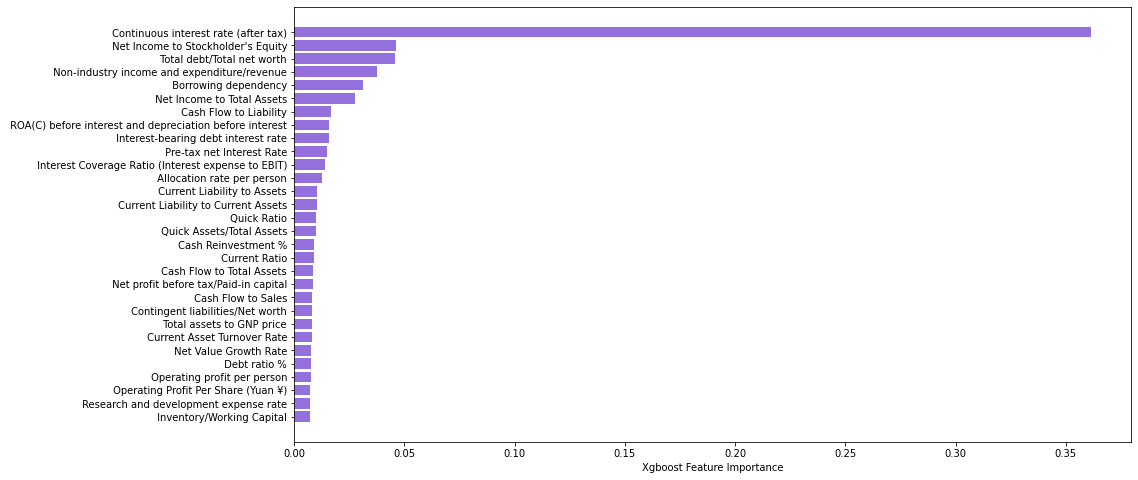

In [ ]:
xgb = xgboost.XGBClassifier(
    sampling_method = 'gradient_based',
    max_depth = 6,
    reg_lambda = 1.5 ,
    learning_rate = 0.4 ,
    reg_alpha = 0,
    seed = 27 
)

xgb.fit(X_train_sm, y_train_sm)

fig, ax = plt.subplots(figsize=(15, 8))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx[-30:]], xgb.feature_importances_[sorted_idx[-30:]], color = "MediumPurple")
plt.xlabel("Xgboost Feature Importance")

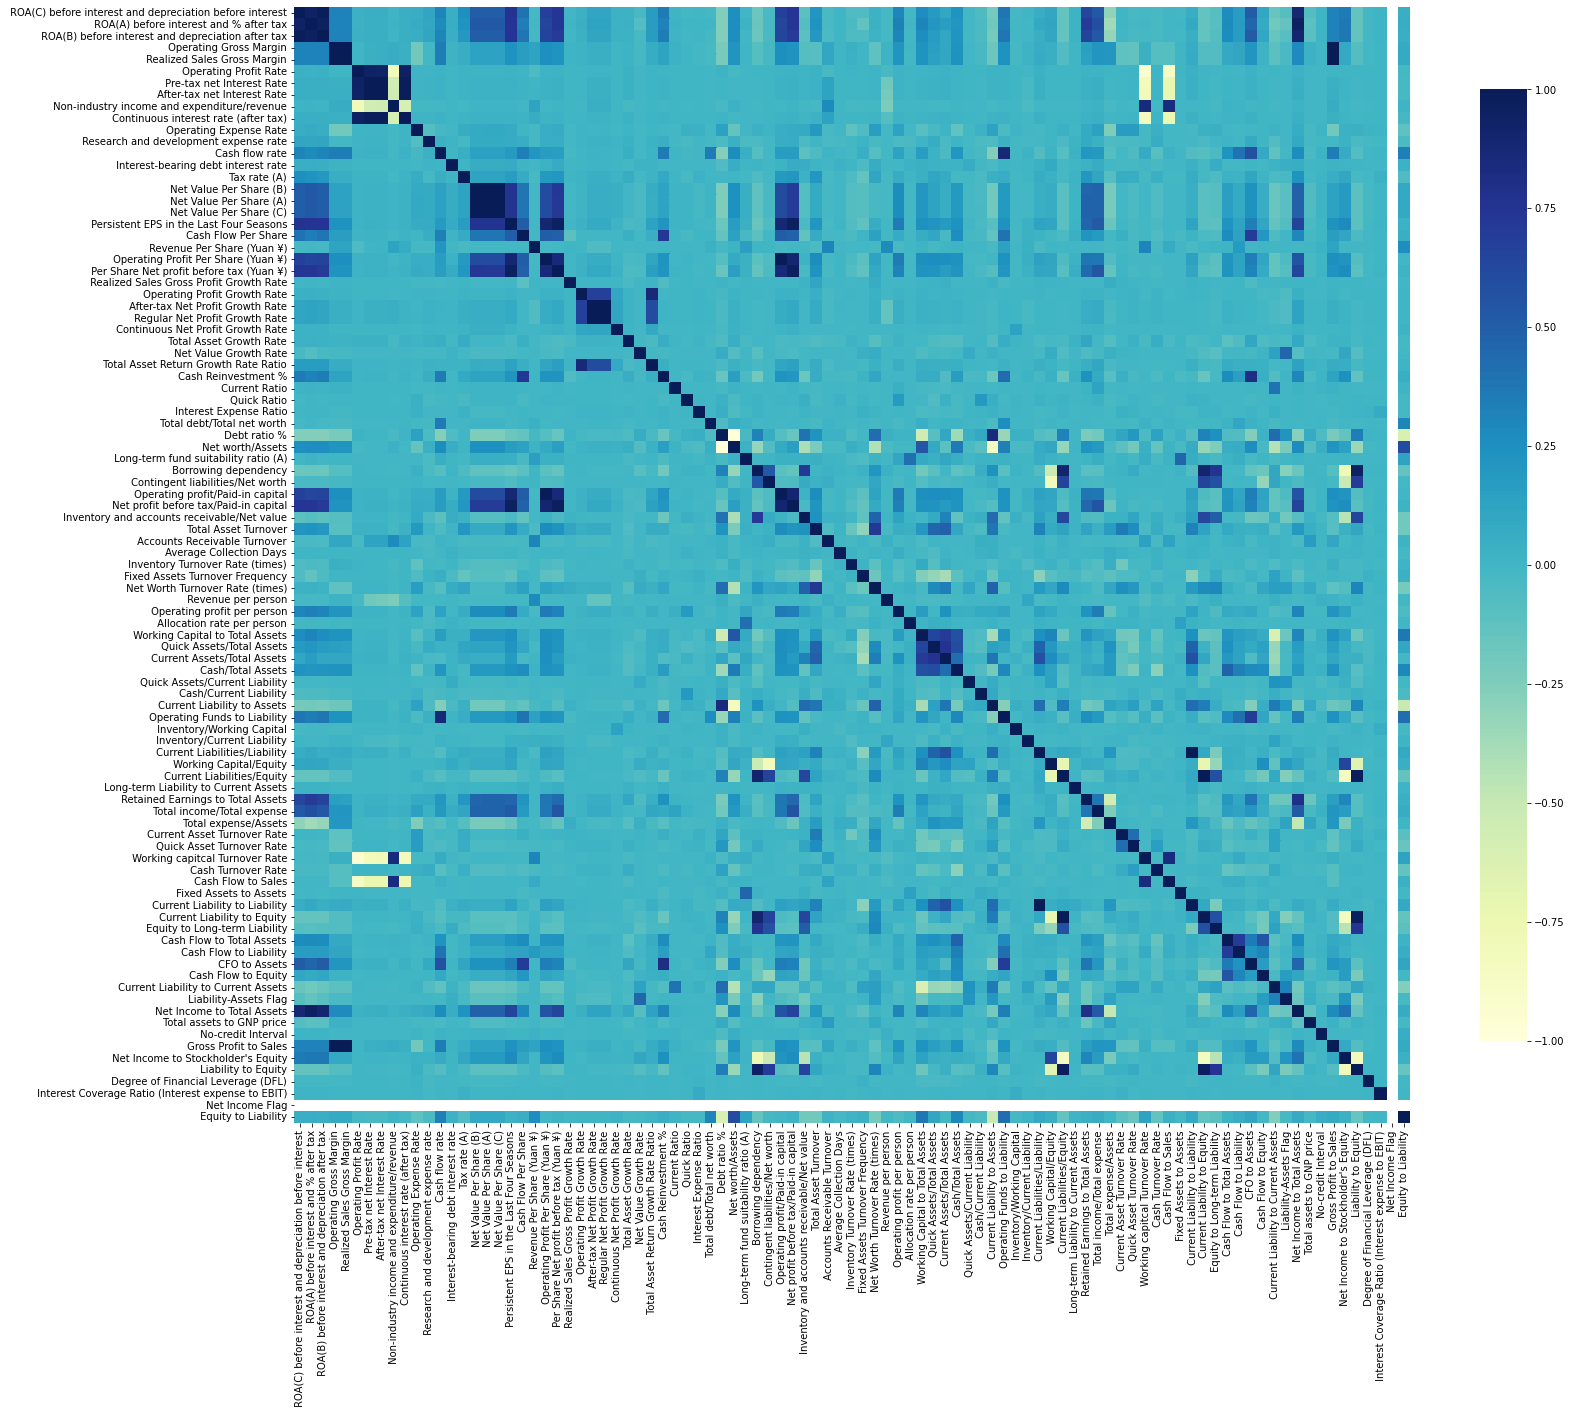

In [62]:
correlations = X_train.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
            square=True, linewidths=0, annot=False, cbar_kws={"shrink": .70}
           )
plt.show();

In [68]:
for x in models:
    
    if x == 'Logreg':
        test = scaler.transform(X_test)
    else:
        test=X_test
    print('------------------------'+x+'------------------------')
    model = models[x]
    y_test_pred = model.predict(test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

------------------------Logreg------------------------
[[1633   17]
 [  33   22]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.56      0.40      0.47        55

    accuracy                           0.97      1705
   macro avg       0.77      0.69      0.73      1705
weighted avg       0.97      0.97      0.97      1705

------------------------GradientBoost------------------------
[[1637   13]
 [  36   19]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1650
           1       0.59      0.35      0.44        55

    accuracy                           0.97      1705
   macro avg       0.79      0.67      0.71      1705
weighted avg       0.97      0.97      0.97      1705

------------------------XGBoost------------------------
[[1647    3]
 [  41   14]]
              precision    recall  f1-score   support

           0       0.98      1.00    

In [66]:
# Test set
y_test_pred_prob = xgb.predict_proba(X_test)
y_test_pred_prob_lowerThres = y_test_pred_prob[:,1] > 0.1
arg_test = {'y_true':y_test, 'y_pred':y_test_pred_prob_lowerThres}
print("TEST\n")
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

# Train set
y_train_pred_prob = xgb.predict_proba(X_train)
y_train_pred_prob_lowerThres = y_train_pred_prob[:,1] > 0.1
arg_train = {'y_true':y_train, 'y_pred':y_train_pred_prob_lowerThres}
print("TRAIN\n")
print('------------------Tuned XGBoost + SMOTE------------------------')
print(confusion_matrix(**arg_train))
print(classification_report(**arg_train))

TEST

[[1579   71]
 [  13   42]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1650
           1       0.37      0.76      0.50        55

    accuracy                           0.95      1705
   macro avg       0.68      0.86      0.74      1705
weighted avg       0.97      0.95      0.96      1705

TRAIN

------------------Tuned XGBoost + SMOTE------------------------
[[4909   40]
 [   0  165]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4949
           1       0.80      1.00      0.89       165

    accuracy                           0.99      5114
   macro avg       0.90      1.00      0.94      5114
weighted avg       0.99      0.99      0.99      5114

